# MRSequoia: Building a sequence using SequenceBuilder
![](MRSequoiaLogo_200px.png)

#### Written by Sebastian Hirsch (sebastian.hirsch@bccn-berlin.de)

This notebook demonstrates how to build, visualize and export a sequence using SequenceBuilder.

In [2]:
from SeqTree.SequenceBuilder import SequenceBuilder
from SeqTree.LoopNode import LoopNode
from SeqTree.DelayNode import DelayNode
from Atoms.TXAtom import TXAtom
from SeqTree.PhaseEncoderNode import PhaseEncoderNode
from SeqTree.CompoundNode import CompoundNode

Disclaimer: While a lot of effort has gone into development of this software, it still has to be considered unvalidated. By using this software you agree to not hold its developer(s) responsible for any harm or damage that might result from deploying a custom sequence. Ensuring the safety of a sequence is the sole responsibility of the sequence developer(s).


In [3]:
sb = SequenceBuilder(max_amplitude=40, max_slewrate=200e-3)

med = sb.mediator

n_pe = 64
n_ro = 64
fov_ro = 0.256
fov_pe = 0.256

pe_loop = LoopNode.pe_loop(med, n_pe, duration=1e6)

pe_grad = PhaseEncoderNode('PE-grad', med, 500, fov_pe, n_pe, 100, 100, 'pe_idx')

pe_rev_grad = PhaseEncoderNode('PE-rewinder', med, 500, fov_pe, n_pe, 100, 100, 'pe_idx', rewinder=True)

tx_atom = TXAtom.sinc_pulse(0, 90, 5120, 0)
exc_comp = sb.excitation_node('Excitation', tx_atom, 5e-3)

ro_comp = sb.readout_node('Readout_comp', fov_ro, n_ro, 500, 300)

sb.add_child(sb.root, pe_loop)
sb.add_child(pe_loop, exc_comp)
sb.add_child(pe_loop, pe_grad)
sb.add_child(pe_loop, ro_comp)
sb.add_child(pe_loop, pe_rev_grad)


# Build and export the sequence:
st, simu_params = sb.build_sequence()

In [4]:
from MRiLabExporter import MRiLabExporter
import os

ex = MRiLabExporter(st, 100)
outpath = os.path.expanduser('~/MRSequoia_data/ge_test')
ex.write_mrilab_xml(outpath, 'PSD_ge_test.xml', simu_params)

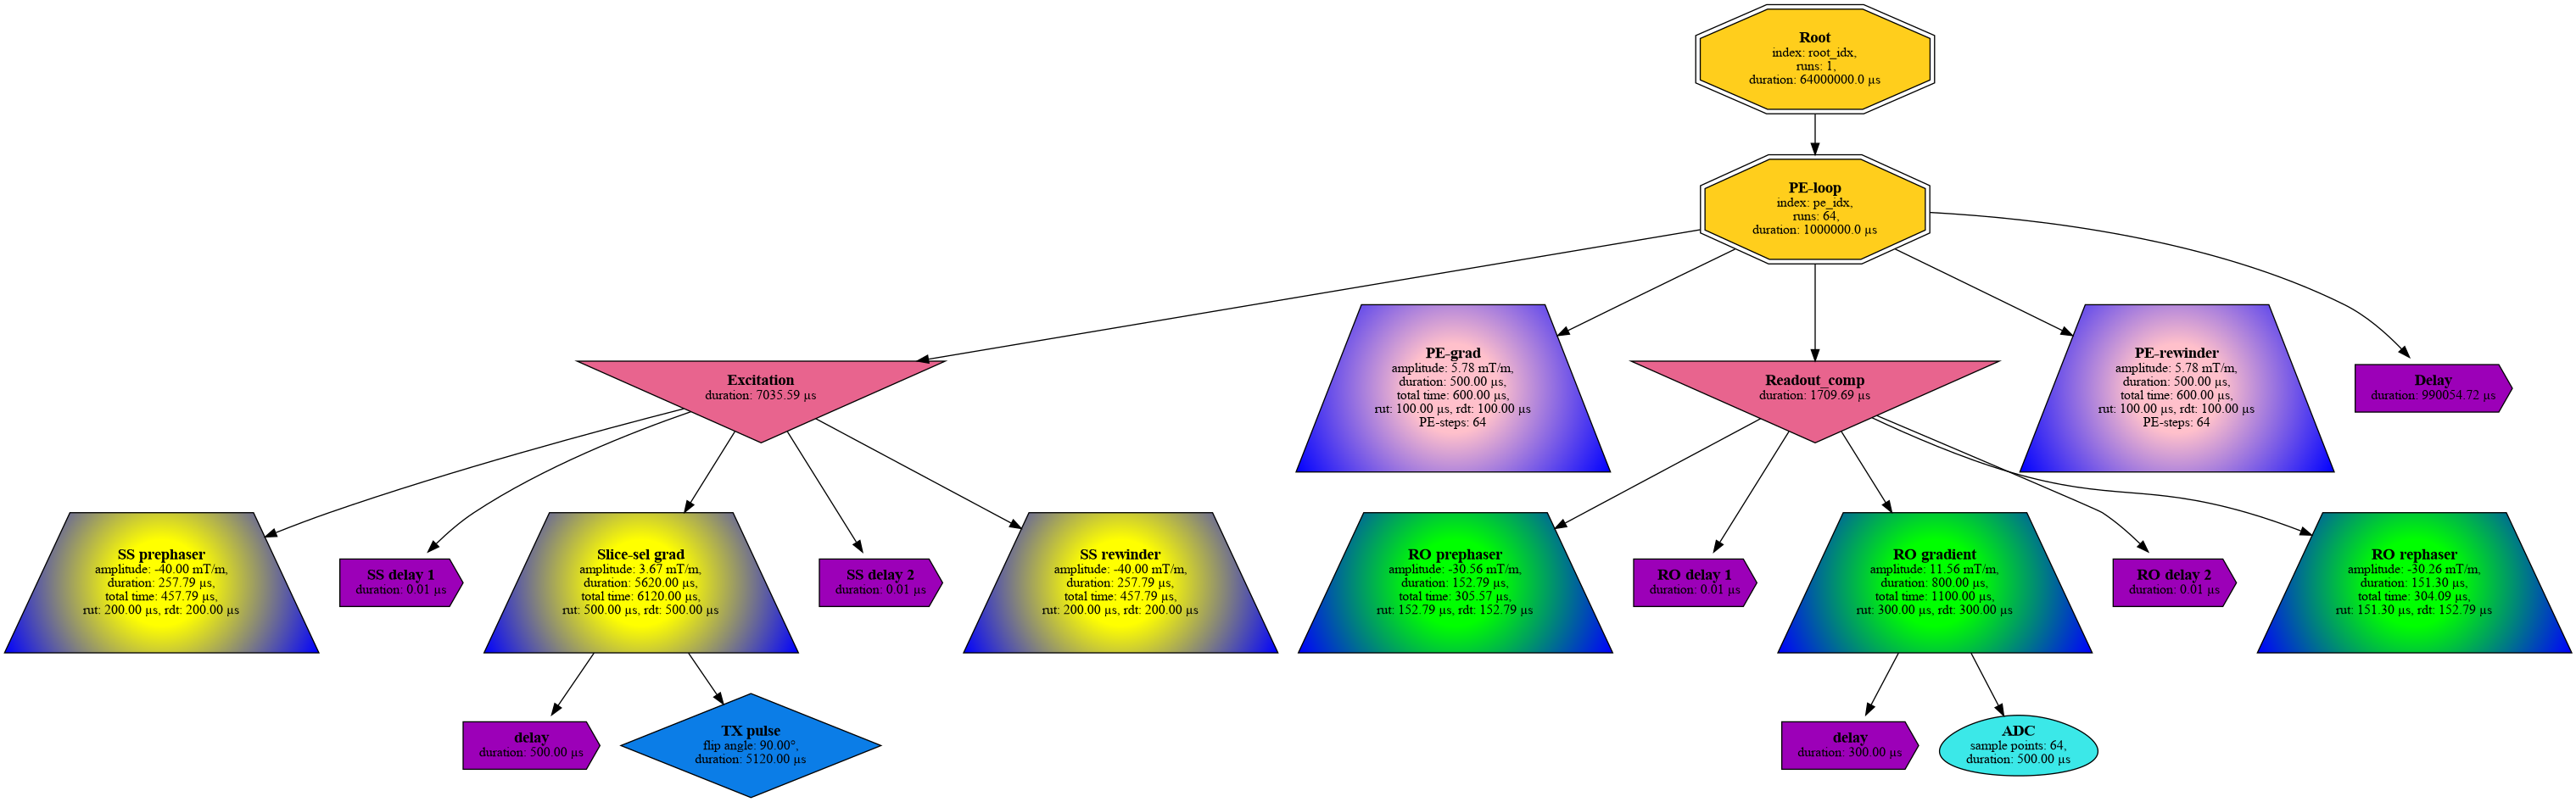

In [5]:
sb.plot_tree()

In [5]:
%matplotlib widget
from SequenceDiagram import SequenceDiagram

sd = SequenceDiagram(st)
sd.plot()

Note: To use interactive plotting widgets, you have to execute "%matplotlib widget" in JupyterLab before running a plotting command


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output()